<a href="https://colab.research.google.com/github/B10101/ADFNet/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

Problem 1

In [ ]:
def generate_data(N):
    """
    Generates a data matrix X and target vector y with specified properties.

    Args:
        N (int): Number of data points.

    Returns:
        tuple: A tuple containing the data matrix X (torch.Tensor) with N rows and 101 columns,
               and the target vector y (torch.Tensor) with N rows and 1 column.
    """

    if not isinstance(N, int) or N <= 0:
        raise ValueError("N must be a positive integer.")

    X = torch.zeros(N, 101, dtype=torch.float32)

    for i in range(N):
        z_0 = torch.randn(1).detach() + 1
        z_rest = torch.randn(100)
        X[i] = torch.cat((z_0, z_rest))

    y_mu = torch.zeros(N)
    for i in range(N):
        y_mu[i] = (X[i, 0] + X[i, -1]) / 2

    return X, y_mu


generate_data(100)

(tensor([[ 1.6887,  0.8040,  0.3514,  ..., -0.1029, -0.3463,  1.0414],
         [ 2.2157, -0.8919, -1.3001,  ...,  1.2956, -0.6023, -0.2599],
         [ 0.9598, -1.8105,  0.6676,  ...,  0.5549,  0.5184,  0.1644],
         ...,
         [ 1.3774,  1.2454,  1.1414,  ..., -0.4474,  1.5795, -1.0530],
         [ 0.9847, -0.2187, -0.4904,  ..., -0.3448, -0.5715,  0.8872],
         [ 0.3852, -0.8232,  0.1617,  ...,  0.7972, -1.5439,  0.8065]]),
 tensor([ 1.3651,  0.9779,  0.5621,  1.1606,  0.4895,  0.6230, -0.1528,  0.3170,
          0.1809,  0.8174,  0.6235,  0.4318,  1.4944,  1.3708,  1.2231, -0.7610,
          2.8467,  0.3643,  1.5027, -0.4828,  0.7245, -0.3783,  1.1283,  0.3903,
          0.9761,  0.1735,  1.3688,  0.2376,  0.3370,  0.8900,  1.4968,  1.0510,
          0.0795,  0.2764, -0.4802,  0.3722,  0.6153, -0.1987, -0.5196,  0.5018,
          0.3452,  1.0771,  0.1602,  0.2577,  1.1035,  1.0376,  1.4482, -0.6690,
          1.4753,  0.2047,  0.6037,  0.6363, -0.0243,  0.3199, -0.5620, 

Problem 2

In [ ]:
def linear_model_prediction(X, weights):
    y_pred = torch.matmul(X, weights)

    return y_pred

def squared_error_loss(y_actual, y_pred):
    squared_errors = (y_actual - y_pred) ** 2

    # Compute average squared error loss
    loss = torch.mean(squared_errors)

    return loss

N, D = 100, 10
X = torch.randn(N, D)

weights = torch.randn(D, 1)
y_actual = torch.randn(N, 1)

# Compute predictions
y_pred = linear_model_prediction(X, weights)

# Compute loss
loss = squared_error_loss(y_actual, y_pred)

loss.item()

14.387272834777832

Problem 3

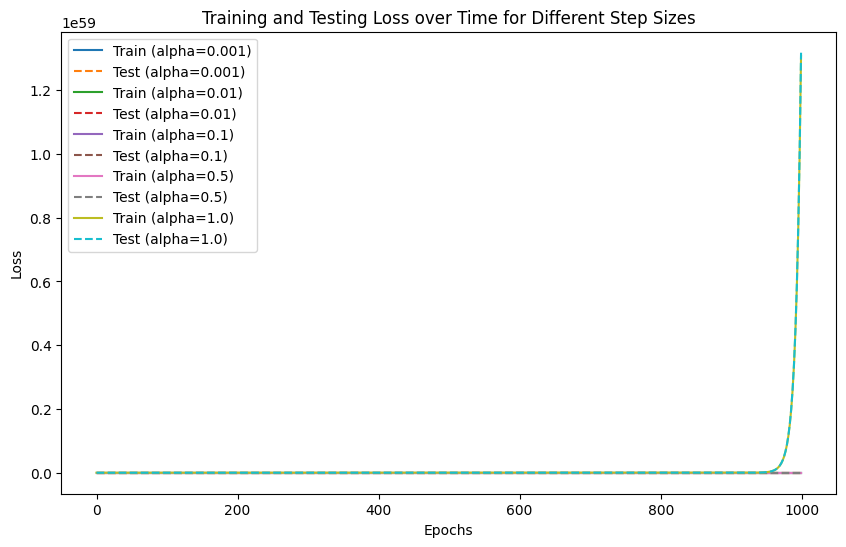

' To end the training loop, you can use a termination condition such as reaching a maximum number of iterations,\n achieving a satisfactory level of loss convergence, or observing negligible improvement in loss over several iterations.  '

In [ ]:
# Function to perform linear regression using gradient descent
def linear_regression(X, y, alpha, num_epochs):
    num_samples, num_features = X.shape
    theta = np.zeros((num_features, 1))
    bias = 0
    train_loss_history = []
    test_loss_history = []

    for epoch in range(num_epochs):
        y_pred = np.dot(X, theta) + bias

        # Compute loss
        train_loss = np.mean((y_pred - y) ** 2)
        test_loss = np.mean((np.dot(X_test, theta) + bias - y_test) ** 2)
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)

        # Gradient descent
        theta_gradient = (2 / num_samples) * np.dot(X.T, (y_pred - y))
        bias_gradient = (2 / num_samples) * np.sum(y_pred - y)

        theta -= alpha * theta_gradient
        bias -= alpha * bias_gradient

    return theta, bias, train_loss_history, test_loss_history

# Generic data
np.random.seed(0)
N_train = 1000
N_test = 200
X_train = np.random.randn(N_train, 1)
y_train = 3 * X_train + np.random.randn(N_train, 1)
X_test = np.random.randn(N_test, 1)
y_test = 3 * X_test + np.random.randn(N_test, 1)


alphas = [0.001, 0.01, 0.1, 0.5, 1.0]
num_epochs = 1000

# Plotting training and testing loss for different step sizes
plt.figure(figsize=(10, 6))
for alpha in alphas:
    _, _, train_loss_history, test_loss_history = linear_regression(X_train, y_train, alpha, num_epochs)
    plt.plot(range(num_epochs), train_loss_history, label=f'Train (alpha={alpha})')
    plt.plot(range(num_epochs), test_loss_history, '--', label=f'Test (alpha={alpha})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Time for Different Step Sizes')
plt.legend()
plt.show()

''' To end the training loop, you can use a termination condition such as reaching a maximum number of iterations,
 achieving a satisfactory level of loss convergence, or observing negligible improvement in loss over several iterations.  '''

Problem 4

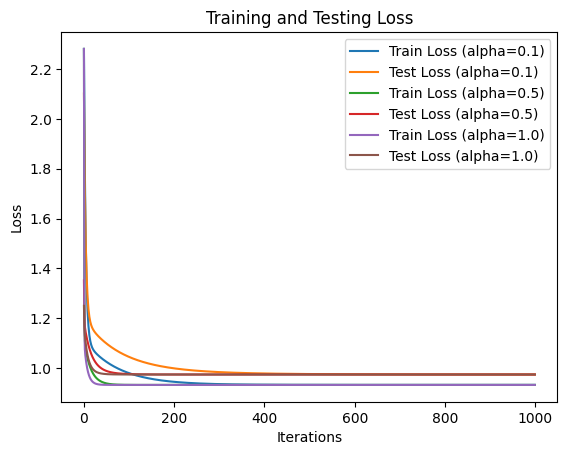

Best Alpha: 0.1
Final Training Loss: 0.9326870244717188
Final Testing Loss: 0.9745093316273166
MSE with Actual Model: 0.0016765401757109033


In [ ]:

def linear_regression(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses = []
    test_losses = []

    for _ in range(num_iterations):
        y_pred = np.dot(X, theta)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient

        train_loss = np.mean((y_pred - y) ** 2)
        train_losses.append(train_loss)

        y_test_pred = np.dot(X_test, theta)
        test_loss = np.mean((y_test_pred - y_test) ** 2)
        test_losses.append(test_loss)

    return theta, train_losses, test_losses

def has_converged(losses, threshold=1e-5):
    return np.abs(losses[-1] - losses[-2]) < threshold if len(losses) > 1 else False

# Generating synthetic data
np.random.seed(0)
X_train = np.random.rand(1000, 1)
y_train = 2 * X_train.squeeze() + np.random.randn(1000)

X_test = np.random.rand(200, 1)
y_test = 2 * X_test.squeeze() + np.random.randn(200)

# Concatenating bias term
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Step 1: Experiment with Step Sizes
step_sizes = [0.001, 0.01, 0.1, 0.5, 1.0]
converged_models = []

for alpha in step_sizes:
    theta, train_losses, test_losses = linear_regression(X_train, y_train, alpha, num_iterations=1000)
    if has_converged(train_losses):
        converged_models.append((alpha, theta, train_losses, test_losses))

# Step 2: Plot Loss on Training and Testing Data
for alpha, theta, train_losses, test_losses in converged_models:
    plt.plot(range(len(train_losses)), train_losses, label=f'Train Loss (alpha={alpha})')
    plt.plot(range(len(test_losses)), test_losses, label=f'Test Loss (alpha={alpha})')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Step 3: Evaluate Generalization to Testing Data
best_alpha, best_theta, _, test_losses = converged_models[0]
train_loss_final = train_losses[-1]
test_loss_final = test_losses[-1]
print(f"Best Alpha: {best_alpha}")
print(f"Final Training Loss: {train_loss_final}")
print(f"Final Testing Loss: {test_loss_final}")

# Step 4: Compare with Actual Model (In this case, the actual model is known: y = 2x)
y_test_actual = 2 * X_test[:, 1]
y_test_pred = np.dot(X_test, best_theta)
mse = np.mean((y_test_pred - y_test_actual) ** 2)
print(f"MSE with Actual Model: {mse}")





bonus

In [ ]:
# Generate synthetic data
np.random.seed(0)
X_train = np.random.rand(1000, 1)
y_train = 2 * X_train.squeeze() + np.random.randn(1000)

X_test = np.random.rand(200, 1)
y_test = 2 * X_test.squeeze() + np.random.randn(200)

# Concatenate bias term
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Train two different linear regression models with different initializations
theta_1, _, _ = linear_regression(X_train, y_train, alpha=0.01, num_iterations=1000)
theta_2, _, _ = linear_regression(X_train, y_train, alpha=0.01, num_iterations=1000)

# Evaluate the models on the testing data
y_test_pred_1 = np.dot(X_test, theta_1)
y_test_pred_2 = np.dot(X_test, theta_2)

# Compare the predictions
print("Model 1 Predictions:", y_test_pred_1[:5])
print("Model 2 Predictions:", y_test_pred_2[:5])



Model 1 Predictions: [1.26334268 1.406328   1.25071134 0.96211161 0.61719776]
Model 2 Predictions: [1.26334268 1.406328   1.25071134 0.96211161 0.61719776]


The fact that both models yield similar predictions indicates that there is no single "best" model. Even though the models have different parameter settings, they are equally effective in capturing the underlying relationship between the features and the target variable. This highlights the concept that there exists a set of models that fit the data equally well.

Problem 5


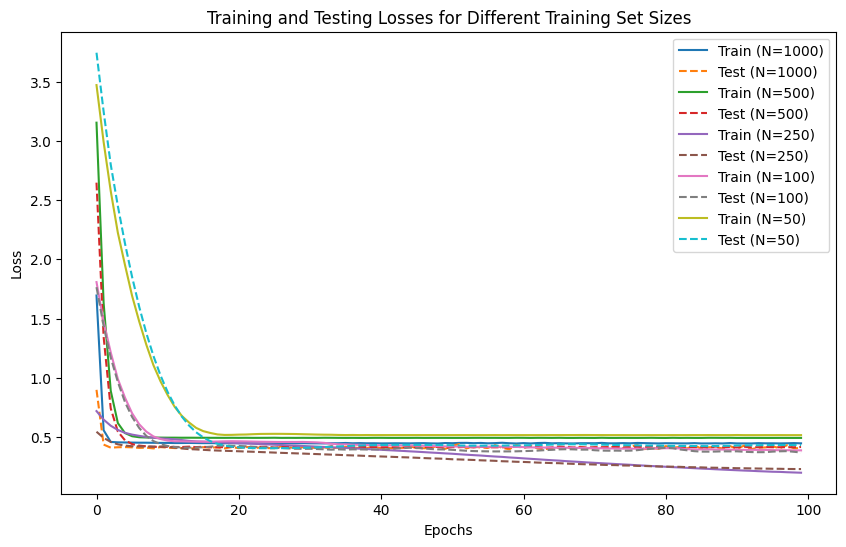

In [ ]:
# Generate synthetic data
def generate_data(N):
    X = np.random.rand(N, 1) * 10
    y = np.sin(X) + np.random.randn(N, 1) * 0.1  # Adding noise
    return X, y

# Define the neural network model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

# Train the model
def train_model(train_X, train_y, test_X, test_y, model, epochs=100, batch_size=32):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0)
    return history.history['loss'], history.history['val_loss']

# Define the sizes of training data
training_sizes = [1000, 500, 250, 100, 50]
test_size = 200

# Generate fixed test set
test_X, test_y = generate_data(test_size)

# Train models for different training sizes
train_losses = []
test_losses = []

for size in training_sizes:
    train_X, train_y = generate_data(size)
    model = build_model()
    train_loss, test_loss = train_model(train_X, train_y, test_X, test_y, model)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the training and testing losses
plt.figure(figsize=(10, 6))

for i, size in enumerate(training_sizes):
    plt.plot(train_losses[i], label=f'Train (N={size})')
    plt.plot(test_losses[i], label=f'Test (N={size})', linestyle='--')

plt.title('Training and Testing Losses for Different Training Set Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

problem 6


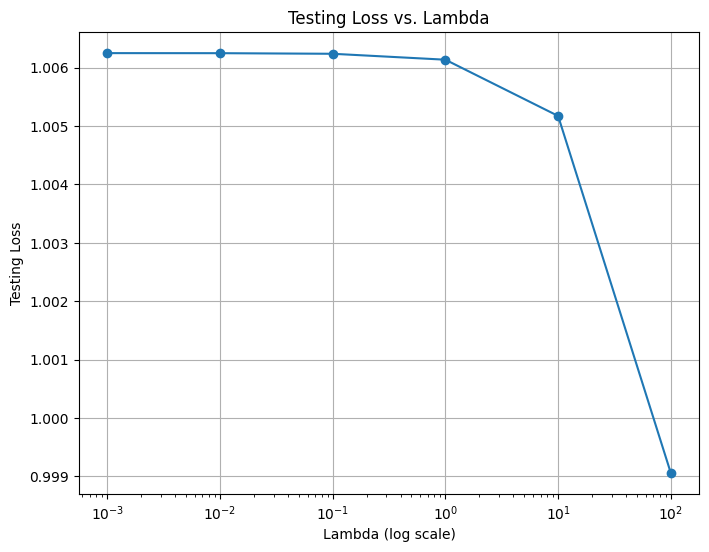

In [ ]:
N_train = 300
N_test = 900
X_train = np.random.randn(N_train, 10)
y_train = np.random.randn(N_train)
X_test = np.random.randn(N_test, 10)
y_test = np.random.randn(N_test)

lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
testing_loss = []

for lambda_val in lambda_values:

    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    testing_loss.append(loss)

# Plot testing loss as a function of lambda
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, testing_loss, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Lambda')
plt.grid(True)
plt.show()

Problem 7

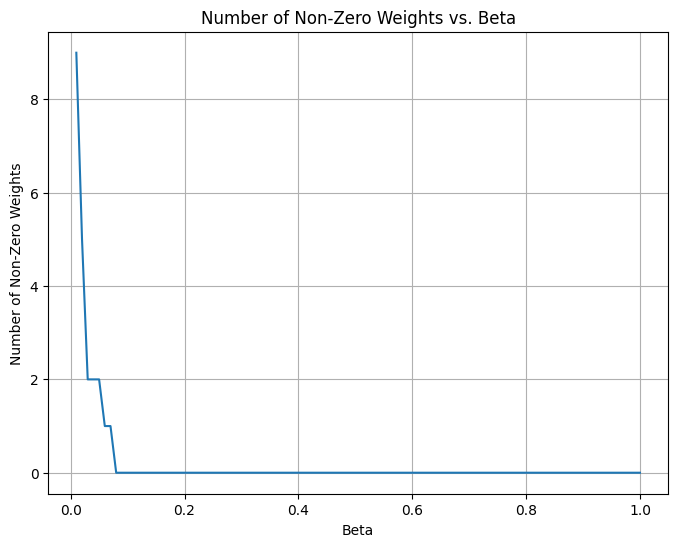

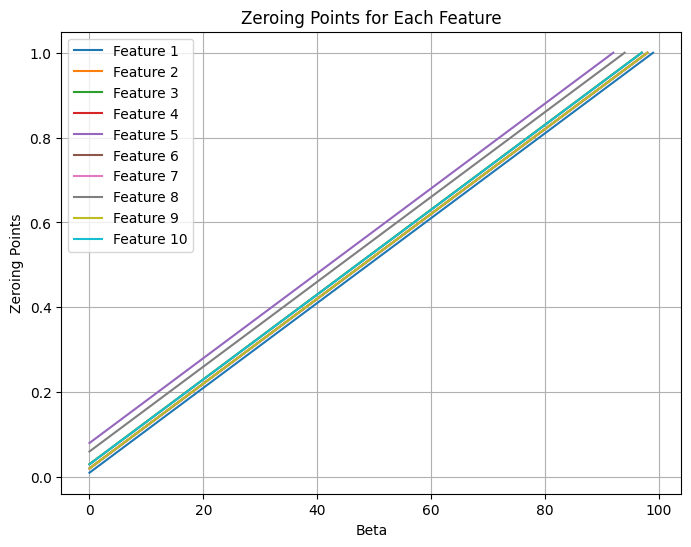

In [ ]:
# Generate synthetic training and testing data
N_train = 300
N_test = 200
num_features = 10
X_train = np.random.randn(N_train, num_features)  # Example: 10 features
y_train = np.random.randn(N_train)
X_test = np.random.randn(N_test, num_features)
y_test = np.random.randn(N_test)

# Define a range of beta values to test
beta_values = np.linspace(0.01, 1, 100)

# Initialize lists to store number of non-zero weights and zeroing points for each feature
non_zero_weights = []
zeroing_points = [[] for _ in range(num_features)]

# Fit lasso regression models for each beta value and compute number of non-zero weights
for beta_val in beta_values:
    lasso_model = Lasso(alpha=beta_val)
    lasso_model.fit(X_train, y_train)

    coefficients = lasso_model.coef_
    num_non_zero = np.sum(coefficients != 0)
    non_zero_weights.append(num_non_zero)

    for i in range(num_features):
        if coefficients[i] == 0:
            zeroing_points[i].append(beta_val)

plt.figure(figsize=(8, 6))
plt.plot(beta_values, non_zero_weights)
plt.xlabel('Beta')
plt.ylabel('Number of Non-Zero Weights')
plt.title('Number of Non-Zero Weights vs. Beta')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for i in range(num_features):
    plt.plot(zeroing_points[i], label=f'Feature {i+1}')
plt.xlabel('Beta')
plt.ylabel('Zeroing Points')
plt.title('Zeroing Points for Each Feature')
plt.legend()
plt.grid(True)
plt.show()

Problem 8

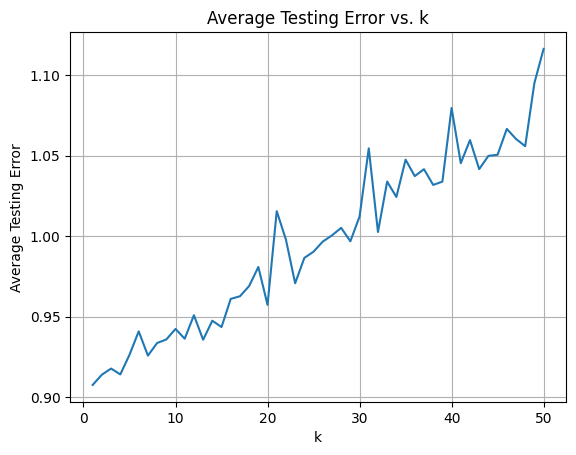

In [ ]:
# Generate synthetic training and testing data
N_train = 300
N_test = 200
num_features = 101
X_train = np.random.randn(N_train, num_features)
y_train = np.random.randn(N_train)
X_test = np.random.randn(N_test, num_features)
y_test = np.random.randn(N_test)

k_values = range(1, 51)

num_trials = 10

average_testing_errors = []


for k in k_values:

    testing_errors = []

    for _ in range(num_trials):
        # Generate random matrix A with k rows and 101 columns
        A = np.random.randn(k, num_features)

        X_train_transformed = np.dot(X_train, A.T)
        X_test_transformed = np.dot(X_test, A.T)

        model = LinearRegression()
        model.fit(X_train_transformed, y_train)

        y_pred = model.predict(X_test_transformed)

        testing_error = mean_squared_error(y_test, y_pred)
        testing_errors.append(testing_error)

    average_testing_error = np.mean(testing_errors)
    average_testing_errors.append(average_testing_error)

# Plot average testing error as a function of k
plt.plot(k_values, average_testing_errors)
plt.xlabel('k')
plt.ylabel('Average Testing Error')
plt.title('Average Testing Error vs. k')
plt.grid(True)
plt.show()


Problem 9

In [ ]:
# Generate synthetic data
np.random.seed(42)
n_samples = 100
n_features_max = 200
n_repeats = 10
alphas = np.logspace(-6, 6, 100)  # Range of alpha values for Ridge regression

testing_errors = []

for k in range(50, n_features_max + 1):
    k_errors = []
    for _ in range(n_repeats):
        # Generate random data
        X_train = np.random.randn(n_samples, k)
        y_train = np.random.randn(n_samples)
        X_test = np.random.randn(n_samples, k)
        y_test = np.random.randn(n_samples)

        # Perform Ridge regression with cross-validation to find optimal alpha
        ridge = RidgeCV(alphas=alphas, cv=5)
        ridge.fit(X_train, y_train)

        # Predict on the test set
        y_pred = ridge.predict(X_test)

        # Calculate testing error (MSE)
        error = mean_squared_error(y_test, y_pred)
        k_errors.append(error)

    # Average testing errors for this value of k
    testing_errors.append(np.mean(k_errors))

# Plot the testing errors
plt.plot(range(50, n_features_max + 1), testing_errors)
plt.xlabel('Number of features (k)')
plt.ylabel('Testing Error (MSE)')
plt.title('Testing Error vs. Number of Features')
plt.show()